<a href="https://colab.research.google.com/github/brianhphillips/testrepo/blob/main/LinReg_HomePrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
import kagglehub
import pandas as pd
import os

# Download latest version of the dataset
path = kagglehub.dataset_download("shree1992/housedata")

# Path to dataset file
csv_file = os.path.join(path, "data.csv")

# Load the dataset
df = pd.read_csv(csv_file)
print("Loaded data:")
print(df.head())

Loaded data:
                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated          

In [7]:
# Select relevant numerical columns
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_basement', 'yr_built', 'yr_renovated']
df = df[features + ['price']].dropna()

# Features (X) and Target (y)
X = df[features]
y = df['price']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = model.predict(X_test)

print("R^2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

# Show coefficients
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef}")

R^2 Score: 0.03228385663279787
MSE: 986921767056.1038
bedrooms: -64497.46158651964
bathrooms: 36520.440676088736
sqft_living: 282.9106617492389
sqft_lot: -0.5144141610580846
floors: 69824.74010797788
waterfront: 382459.6663532148
view: 44755.841774773515
condition: 29335.539391512244
sqft_basement: -7.671789321791948
yr_built: -2569.1635330518397
yr_renovated: 8.259917336956732


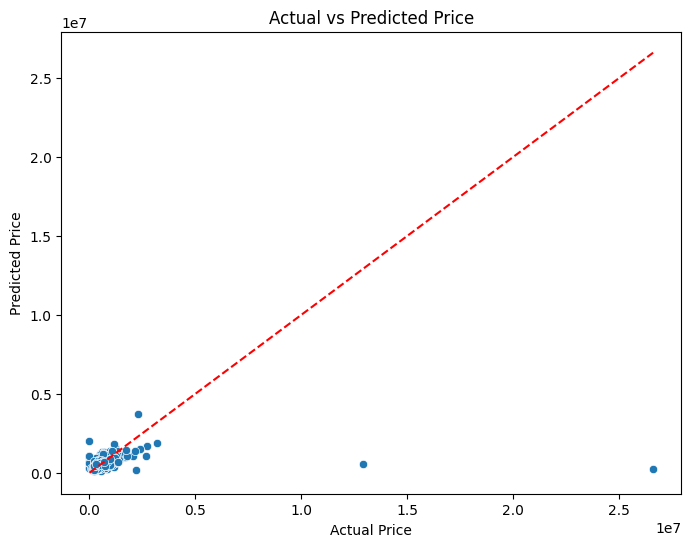

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()